# Capstone project: solar radiation forecasting using machine learning and deep learning methodes 

solar radiation forecasting 
With an increasing number of installed utility-scale PV plants and a growing need for predictable energy generation, the solar industry has started paying attention to solar radiation forecasting.
In this project i used datasets issued from Nasa labs. through its Earth Science research program has long supported satellite systems and research providing data important to the study of climate and climate processes. These data include long-term climatologically averaged estimates of meteorological quantities and surface solar energy fluxes. The goal of the project is builiding a model with the maximum accuracy. Our goal is forecasting daily solar radiation based on the available history starting with a specific site 47°23'34.5"N 124°18'47.5"W and try the same thing later with potential worldwide sits.

## I.Exploratory data analysis:

The data is stored in a CSV file, so we can use Pandas to import the available data in 'first_model.ipynb'

In [138]:
#Loading Time Series Data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pt_1=pd.read_csv('first_solar_point.csv',skiprows=21)
pt_1.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,PS,QV2M,T2M_RANGE,TS,T2MDEW,T2M,WS50M,WS10M,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
0,47.39291,-124.31319,1981,1,1,0.09,100.62,0.005916,4.18,7.71,6.25,7.63,4.77,3.43,-999.0,-999.0,-999.0
1,47.39291,-124.31319,1981,1,2,0.05,100.53,0.005588,4.92,7.57,5.40,7.28,6.60,4.86,-999.0,-999.0,-999.0
2,47.39291,-124.31319,1981,1,3,0.22,100.78,0.005119,3.78,7.12,4.14,6.70,5.34,4.04,-999.0,-999.0,-999.0
3,47.39291,-124.31319,1981,1,4,0.14,101.39,0.005621,3.20,7.81,5.61,7.98,3.43,2.58,-999.0,-999.0,-999.0
4,47.39291,-124.31319,1981,1,5,0.30,101.01,0.005540,4.09,7.64,5.35,7.48,5.25,3.81,-999.0,-999.0,-999.0


In [27]:
#Now, let's look at the information in our dataset:
pt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14358 entries, 0 to 14357
Data columns (total 17 columns):
LAT                  14358 non-null float64
LON                  14358 non-null float64
YEAR                 14358 non-null int64
MO                   14358 non-null int64
DY                   14358 non-null int64
PRECTOT              14358 non-null float64
PS                   14358 non-null float64
QV2M                 14358 non-null float64
T2M_RANGE            14358 non-null float64
TS                   14358 non-null float64
T2MDEW               14358 non-null float64
T2M                  14358 non-null float64
WS50M                14358 non-null float64
WS10M                14358 non-null float64
ALLSKY_SFC_LW_DWN    14358 non-null float64
ALLSKY_SFC_SW_DWN    14358 non-null float64
CLRSKY_SFC_SW_DWN    14358 non-null float64
dtypes: float64(14), int64(3)
memory usage: 1.9 MB


In [28]:
#Exploring all features of the dataset 
pt_1.columns

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'PRECTOT', 'PS', 'QV2M', 'T2M_RANGE',
       'TS', 'T2MDEW', 'T2M', 'WS50M', 'WS10M', 'ALLSKY_SFC_LW_DWN',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN'],
      dtype='object')

Here is the explanation of each variable:
- Value for missing model data cannot be computed or out of model availability range: -999
- Parameter(s): 
- PRECTOT MERRA2 1/2x1/2 Precipitation (mm day-1)
- PS MERRA2 1/2x1/2 Surface Pressure (kPa)
- T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C)
- ALLSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 All Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day)
- WS50M MERRA2 1/2x1/2 Wind Speed at 50 Meters (m/s)
- TS MERRA2 1/2x1/2 Earth Skin Temperature (C)
- KT SRB/FLASHFlux 1/2x1/2 Insolation Clearness Index (dimensionless)
- ALLSKY_SFC_LW_DWN SRB/FLASHFlux 1/2x1/2 Downward Thermal Infrared (Longwave) Radiative Flux (kW-hr/m^2/day)
- WS10M MERRA2 1/2x1/2 Wind Speed at 10 Meters (m/s)
- T2M_MAX MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C)
- T2M_MIN MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C)
- QV2M MERRA2 1/2x1/2 Specific Humidity at 2 Meters (kg kg-1)
- CLRSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 Clear Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day)

In [43]:
pt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14358 entries, 0 to 14357
Data columns (total 18 columns):
LAT                  14358 non-null float64
LON                  14358 non-null float64
YEAR                 14358 non-null int64
MO                   14358 non-null int64
DY                   14358 non-null int64
PRECTOT              14358 non-null float64
PS                   14358 non-null float64
QV2M                 14358 non-null float64
T2M_RANGE            14358 non-null float64
TS                   14358 non-null float64
T2MDEW               14358 non-null float64
T2M                  14358 non-null float64
WS50M                14358 non-null float64
WS10M                14358 non-null float64
ALLSKY_SFC_LW_DWN    14358 non-null float64
ALLSKY_SFC_SW_DWN    14358 non-null float64
CLRSKY_SFC_SW_DWN    14358 non-null float64
Date                 14358 non-null object
dtypes: float64(14), int64(3), object(1)
memory usage: 2.0+ MB


In [36]:
pt_1[['ALLSKY_SFC_LW_DWN','ALLSKY_SFC_SW_DWN','CLRSKY_SFC_SW_DWN']]

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
0,-999.0,-999.0,-999.0
1,-999.0,-999.0,-999.0
2,-999.0,-999.0,-999.0
3,-999.0,-999.0,-999.0
4,-999.0,-999.0,-999.0
...,...,...,...
14353,-999.0,-999.0,-999.0
14354,-999.0,-999.0,-999.0
14355,-999.0,-999.0,-999.0
14356,-999.0,-999.0,-999.0


In [44]:
pt_1['ALLSKY_SFC_LW_DWN'].value_counts()

-999.00    919
 7.65      107
 7.44      105
 7.83       99
 7.91       97
          ... 
 5.59        1
 5.55        1
 5.71        1
 5.37        1
 5.09        1
Name: ALLSKY_SFC_LW_DWN, Length: 398, dtype: int64

In [13]:
#Creating the feature Date by concatenating

In [45]:
pt_1.YEAR.astype('str')
pt_1.MO.astype('str')
pt_1.DY.astype('str')
pt_1['Date']=pt_1.YEAR.astype('str')+'/'+pt_1.MO.astype('str')+'/'+pt_1.DY.astype('str')
pt_1.columns

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'PRECTOT', 'PS', 'QV2M', 'T2M_RANGE',
       'TS', 'T2MDEW', 'T2M', 'WS50M', 'WS10M', 'ALLSKY_SFC_LW_DWN',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'Date'],
      dtype='object')

We need to do two things now:
Make sure that we change the dates in our dataset from "non-null object" to "non-null datetime" (i.e., change the data type of dates). This can be done using the to_datetime() function from Pandas. To make sure Python understands the date correctly, a format argument can be passed as specified in the documentation.
Ensure the date becomes the index.

In [46]:
# Convert Date to a datetime column
pt_1['Date']=pd.to_datetime(pt_1['Date'])

In [47]:
#Checking the date column 
pt_1['Date']

0       1981-01-01
1       1981-01-02
2       1981-01-03
3       1981-01-04
4       1981-01-05
           ...    
14353   2020-04-19
14354   2020-04-20
14355   2020-04-21
14356   2020-04-22
14357   2020-04-23
Name: Date, Length: 14358, dtype: datetime64[ns]

In [48]:
#sorting by dates and check indexes 
pt_1.sort_values('Date').Date.tail(50)

14308   2020-03-05
14309   2020-03-06
14310   2020-03-07
14311   2020-03-08
14312   2020-03-09
14313   2020-03-10
14314   2020-03-11
14315   2020-03-12
14316   2020-03-13
14317   2020-03-14
14318   2020-03-15
14319   2020-03-16
14320   2020-03-17
14321   2020-03-18
14322   2020-03-19
14323   2020-03-20
14324   2020-03-21
14325   2020-03-22
14326   2020-03-23
14327   2020-03-24
14328   2020-03-25
14329   2020-03-26
14330   2020-03-27
14331   2020-03-28
14332   2020-03-29
14333   2020-03-30
14334   2020-03-31
14335   2020-04-01
14336   2020-04-02
14337   2020-04-03
14338   2020-04-04
14339   2020-04-05
14340   2020-04-06
14341   2020-04-07
14342   2020-04-08
14343   2020-04-09
14344   2020-04-10
14345   2020-04-11
14346   2020-04-12
14347   2020-04-13
14348   2020-04-14
14349   2020-04-15
14350   2020-04-16
14351   2020-04-17
14352   2020-04-18
14353   2020-04-19
14354   2020-04-20
14355   2020-04-21
14356   2020-04-22
14357   2020-04-23
Name: Date, dtype: datetime64[ns]

In [50]:
#Slicing the data we will be working on from the whole dataset 
pt_1_timeseries=pt_1[['Date','ALLSKY_SFC_LW_DWN','ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN']]

In [ ]:
#Checking non values 

In [51]:
pt_1_timeseries.isna().sum()

Date                 0
ALLSKY_SFC_LW_DWN    0
ALLSKY_SFC_SW_DWN    0
CLRSKY_SFC_SW_DWN    0
dtype: int64

In [43]:
#Counting the values and checking anomalies 

In [36]:
pt_1_timeseries.ALLSKY_SFC_LW_DWN.value_counts()

-999.00    919
 7.65      107
 7.44      105
 7.83       99
 7.91       97
          ... 
 5.59        1
 5.55        1
 5.71        1
 5.37        1
 5.09        1
Name: ALLSKY_SFC_LW_DWN, Length: 398, dtype: int64

In [52]:
#Ensure the date becomes the index.
pt_1_timeseries.set_index('Date',inplace=True)

In [53]:
#-999.0 refers to Na from the documentation in the website:https://power.larc.nasa.gov/docs/methodology/solar/insolation/
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==-999,:]

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
Date,,,
1981-01-01,-999.0,-999.0,-999.0
1981-01-02,-999.0,-999.0,-999.0
1981-01-03,-999.0,-999.0,-999.0
1981-01-04,-999.0,-999.0,-999.0
1981-01-05,-999.0,-999.0,-999.0
...,...,...,...
2020-04-19,-999.0,-999.0,-999.0
2020-04-20,-999.0,-999.0,-999.0
2020-04-21,-999.0,-999.0,-999.0


In [ ]:
#replacing the -999,0 with nan, it's going be easier for the coming steps of prepocessing to have Nan instead of -999,00
import numpy as np
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==-999,:]=np.nan
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_SW_DWN']==-999,:]=np.nan
pt_1_timeseries.loc[pt_1_timeseries['CLRSKY_SFC_SW_DWN']==-999,:]=np.nan

In [59]:
#Check on the change to Nan
pt_1_timeseries.ALLSKY_SFC_LW_DWN.value_counts(dropna= False)

NaN     4295
7.65      85
7.44      78
7.73      76
7.83      76
        ... 
5.53       1
9.21       1
9.19       1
5.29       1
5.66       1
Name: ALLSKY_SFC_LW_DWN, Length: 388, dtype: int64

As you can see, these new timestamps all have missing values in the resulting data. One of the common ways around this is to fill the current missing value with a previous valid one or with a following valid one . To do this, you can use the .ffill() method as shown below:

In [ ]:
pt_1_timeseries.ffill(inplace=True)

In [62]:
#filling NaN with the following valid values 
pt_1_timeseries.bfill(inplace=True)

In [ ]:
# drop the dates that have same value continuously that was result of backfilling so we don't have a straight line that would represent originally  NaN
pt_1_timeseries.drop(pd.date_range('1981-01-01','1983-06-30'),inplace=True)
pt_1_timeseries.drop(pd.date_range('2020-04-17','2020-04-23'),inplace=True)

In [78]:
#Check NaN before moving forward
pt_1_timeseries.isna().sum()

ALLSKY_SFC_LW_DWN    0
ALLSKY_SFC_SW_DWN    0
CLRSKY_SFC_SW_DWN    0
dtype: int64

In this case, there is no missing data. When our data are missing, they can be handled in a multitude of ways:

Drop the data elements with missing values (this may result in low accuracy and loss of valuable information)
Fill in the missing values under a defined criteria
Use advanced machine learning methods to predict the missing values
In general, the .fillna() method can be used along with methods like .bfill() of .ffill() as an argument/criterion for filling in missing values . .bfill() (backward filling) looks for the next valid entry in the time series and fills the gaps with this value. Similarly, .ffill() can be used to copy forward the previous valid entry of the time series (as demonstrated above).

## II.Visualizing time series data

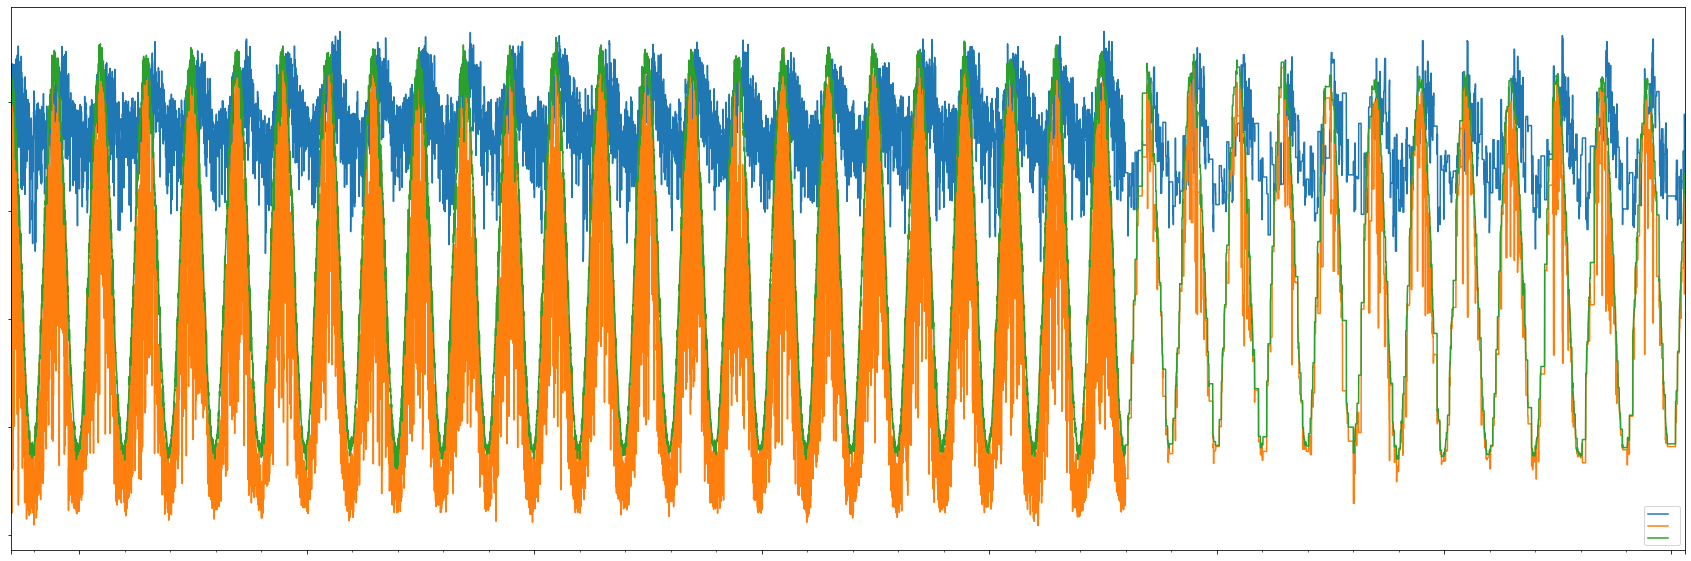

In [140]:
#visualizingtimeseriesdata
import matplotlib.pyplot as plt
%matplotlib inline
pt_1_timeseries.plot(figsize=(30,10))
fig.suptitle('daily radiation', fontsize=20)
plt.xlabel('days',fontsize=18)
plt.ylabel('Radiation(Kwh/m2)',fontsize=16)
plt.show()
#fig.savefig('test.jpg')

we can change the continuous line to dots, each representing one entry in the time series. This can be achieved by changing the `style` parameter of the line plot. Let's pass `style='.b'` as an argument to `.plot()` method.

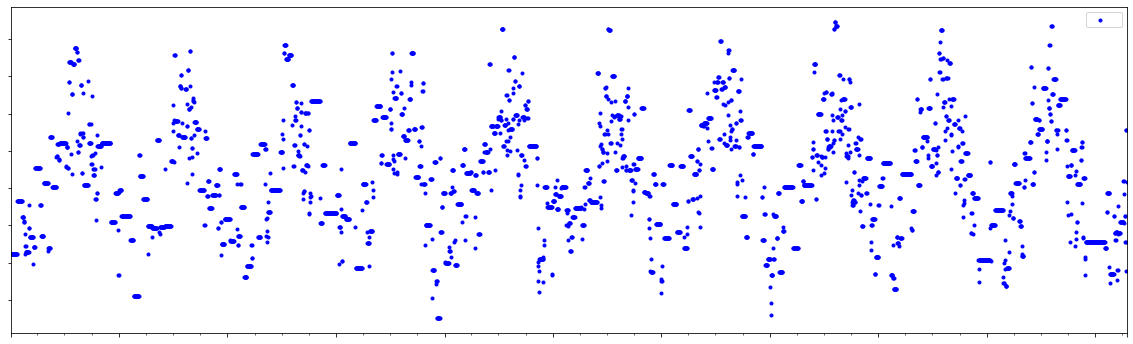

In [168]:
#Draw a dot plot using temp and .plot() method 
pt_1_timeseries['ALLSKY_SFC_LW_DWN']['2010':'2020'].plot(figsize = (20,6), style = '.b',legend=True)

In [ ]:
#Time Series Histogram and Density Plots

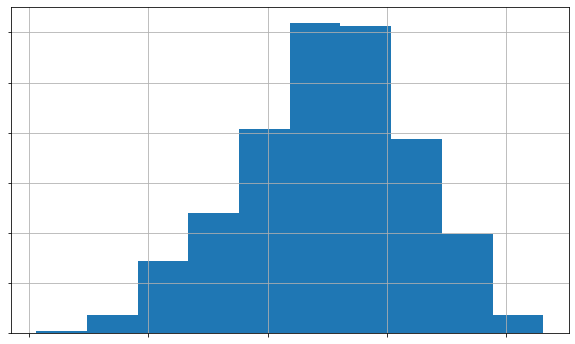

In [159]:
pt_1_timeseries['ALLSKY_SFC_LW_DWN'].hist(figsize = (10,6))

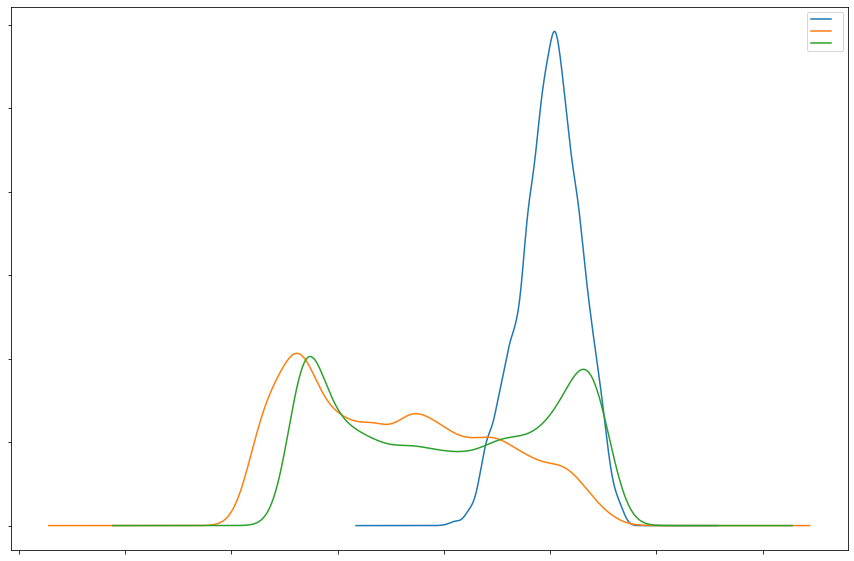

In [167]:
#Plot a density plot for nyse dataset
pt_1_timeseries.plot(kind='kde', figsize = (15,10))

In [166]:
#so we are going to focus on All sky feature since it's the only one distributed normally
pt_1_timeseries_ASK=pt_1_timeseries['ALLSKY_SFC_LW_DWN']

Time series box and whisker plots by year
Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.
Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extent of the observations. Dots are drawn for outliers outside the whiskers or extent of the data.

In [179]:
pt_1_timeseries_ASK

Date
1983-07-01    8.49
1983-07-02    8.15
1983-07-03    8.33
1983-07-04    8.34
1983-07-05    8.03
              ... 
2020-04-12    5.89
2020-04-13    6.28
2020-04-14    7.78
2020-04-15    7.78
2020-04-16    7.08
Name: ALLSKY_SFC_LW_DWN, Length: 13440, dtype: float64

## II.Data Preparation and modeling phase:

In [182]:
#Ensure the frequency to daily
pt_1_timeseries_ASK=pt_1_timeseries_ASK.asfreq('D')

In [183]:
pt_1_timeseries.index

DatetimeIndex(['1983-07-01', '1983-07-02', '1983-07-03', '1983-07-04',
               '1983-07-05', '1983-07-06', '1983-07-07', '1983-07-08',
               '1983-07-09', '1983-07-10',
               ...
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16'],
              dtype='datetime64[ns]', name='Date', length=13440, freq=None)

In [163]:
# Import and apply seasonal_decompose()
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pt_1_timeseries_ASK,freq=365)

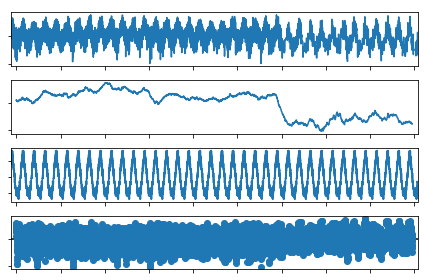

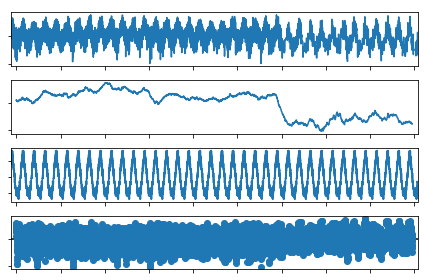

In [164]:
decomposition.plot()

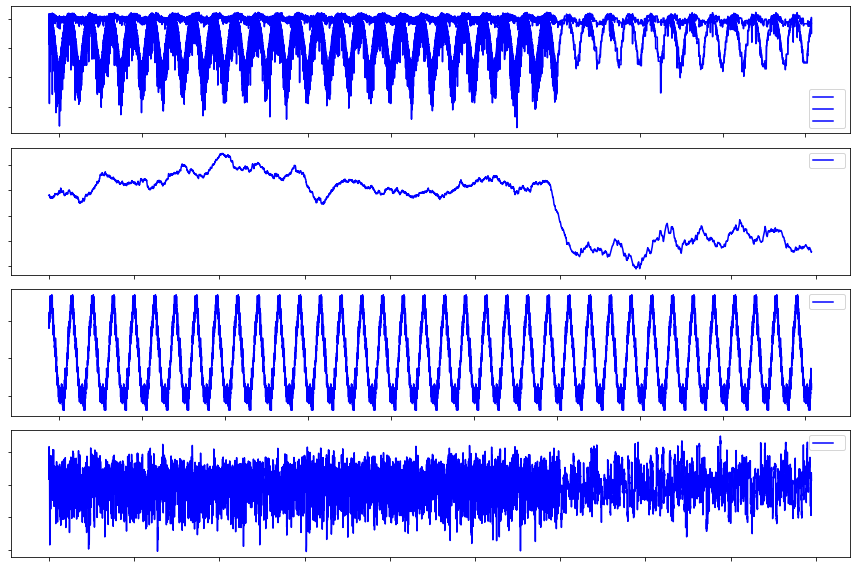

In [171]:
# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(pt_1_timeseries), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('decomposition')

In [186]:
#Calculating the mean
pt_1_timeseries_ASK.mean()

7.493579613095217

### A.Checking stationarity:

In [32]:
#the dicker fuller test 
from statsmodels.tsa.stattools import adfuller

In [39]:
pt_1_timeseries[0:5]

,ALLSKY_SFC_LW_DWN
Date,
2015-01-01,5.15
2015-02-01,5.38
2015-03-01,5.69
2015-04-01,6.30
2015-05-01,6.54


In [ ]:
#Checking stationarity

In [172]:
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.adfuller(pt_1_timeseries_ASK)

(-8.657118936897245,
 4.9345452782663744e-14,
 26,
 13413,
 {'1%': -3.430837627817339,
  '5%': -2.86175550852803,
  '10%': -2.566884710312659},
 13632.66119447256)

In [191]:
#The P-value so small that we Can reject the null hypothesis.

Although Time series modeling require stationarity assumption only few practical times series are stationry. We will try to make a times series stationary even if in reality it is really hard to get a ts perfectly stationary

In [ ]:
here are two major reasons behind non-stationarity of a time series:
Trend: Varying mean over time
Seasonality: Certain variations at specific time-frames

In [ ]:
#modeling the trend and seasonality
Log Transformation: the advantage of taking a log transformation is that the higher values got more penalised than the lower ones.

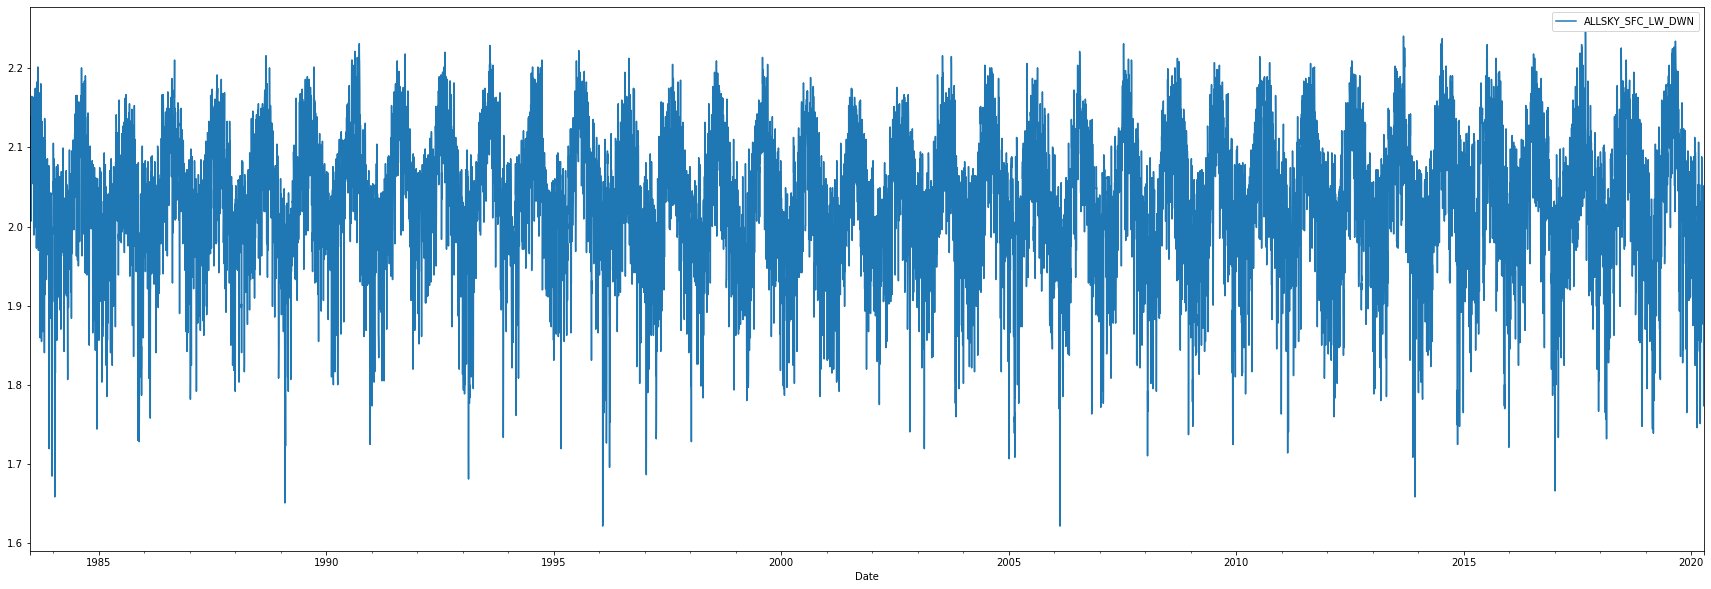

In [49]:
import numpy as np
np.log(pt_1_timeseries).plot(figsize=(30,10))

In [195]:
#subtracting the rolling mean 
roll_mean=pt_1_timeseries.rolling(window=100).mean()

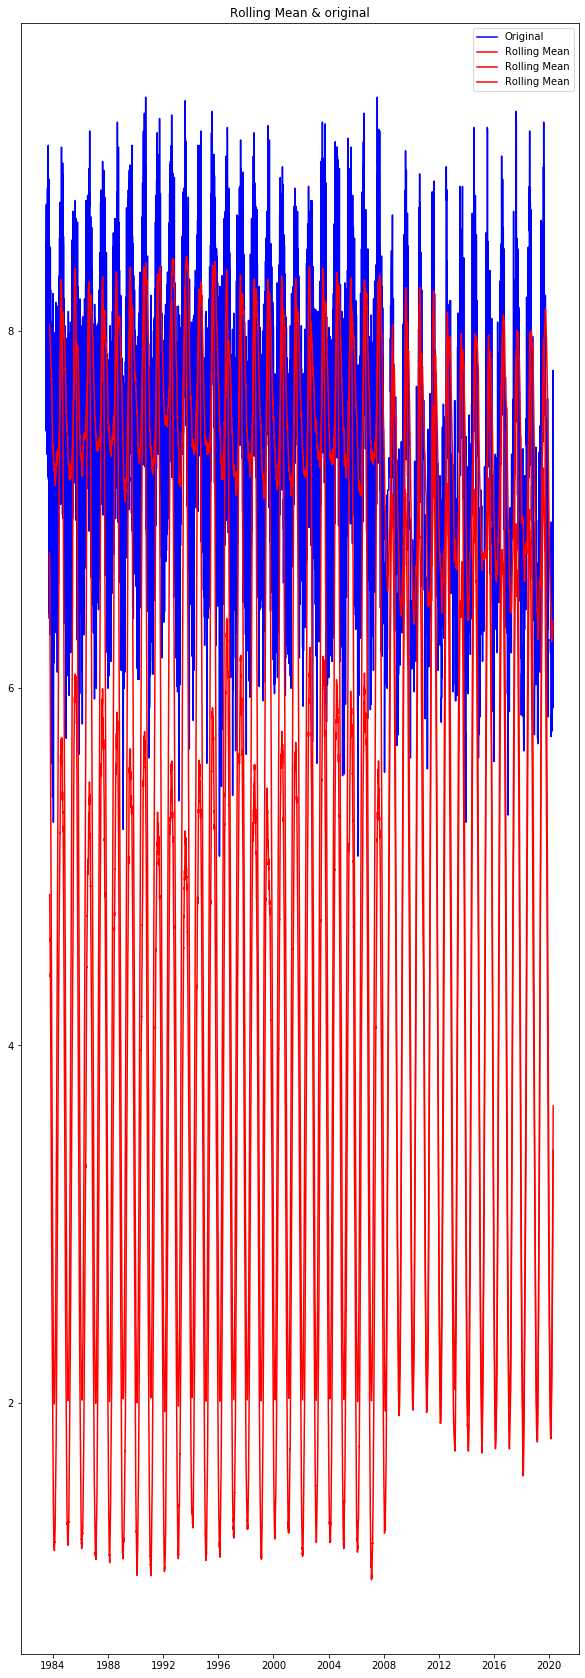

In [196]:
fig = plt.figure(figsize=(10,30))
plt.plot(pt_1_timeseries_ASK, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend()
plt.title('Rolling Mean & original')
plt.show(block=False)

In [48]:
data_minus_roll_mean = pt_1_timeseries - roll_mean

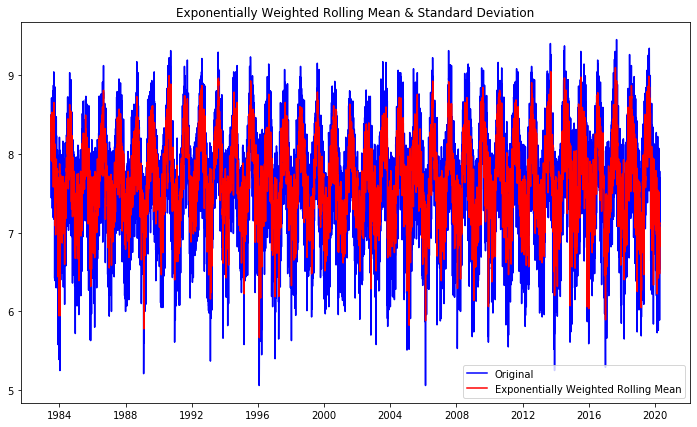

In [42]:
exp_roll_mean = pt_1_timeseries.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(pt_1_timeseries, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [43]:
#differencing:one of the common techniques when dealing with both seasonality and trend
pt_1_timeseries_diff=pt_1_timeseries.diff(periods=1)

In [93]:
#timeseriesmodeling

In [ ]:
We tried to analyse our time series data set in order to find patterns that help us make accurate predictions

In [70]:
#autocorrelation
#lag-10-autocorrelation
pt_1_timeseries_lag_10=pt_1_timeseries.shift(369)
lag_10 = pd.concat([pt_1_timeseries,pt_1_timeseries_lag_10], axis=1)

lag_10.corr()

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_LW_DWN
ALLSKY_SFC_LW_DWN,1.000000,0.365446
ALLSKY_SFC_LW_DWN,0.365446,1.000000


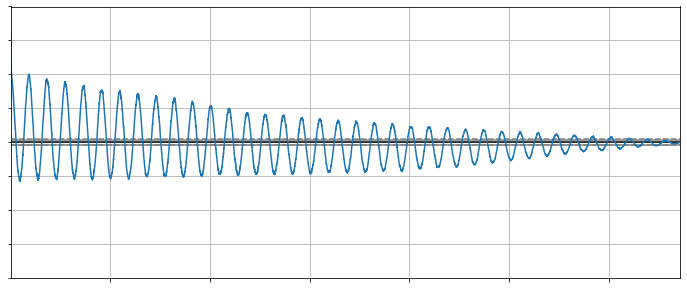

In [174]:
#it will be good to have the autocorrelation for each lag , that's exactly what autocorrelation fonction does
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(pt_1_timeseries_ASK)
plt.savefig('ACP')

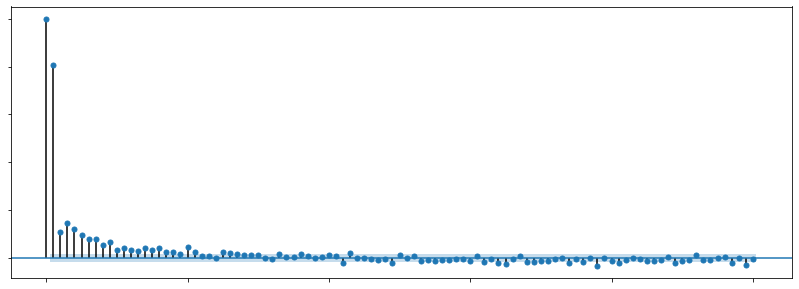

In [175]:
#The partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(pt_1_timeseries_ASK, lags=100);
plt.savefig('PACF')

In [176]:
#Ensuring the daily frequency 
pt_1_timeseries_ASK=pt_1_timeseries_ASK.asfreq('D')

/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

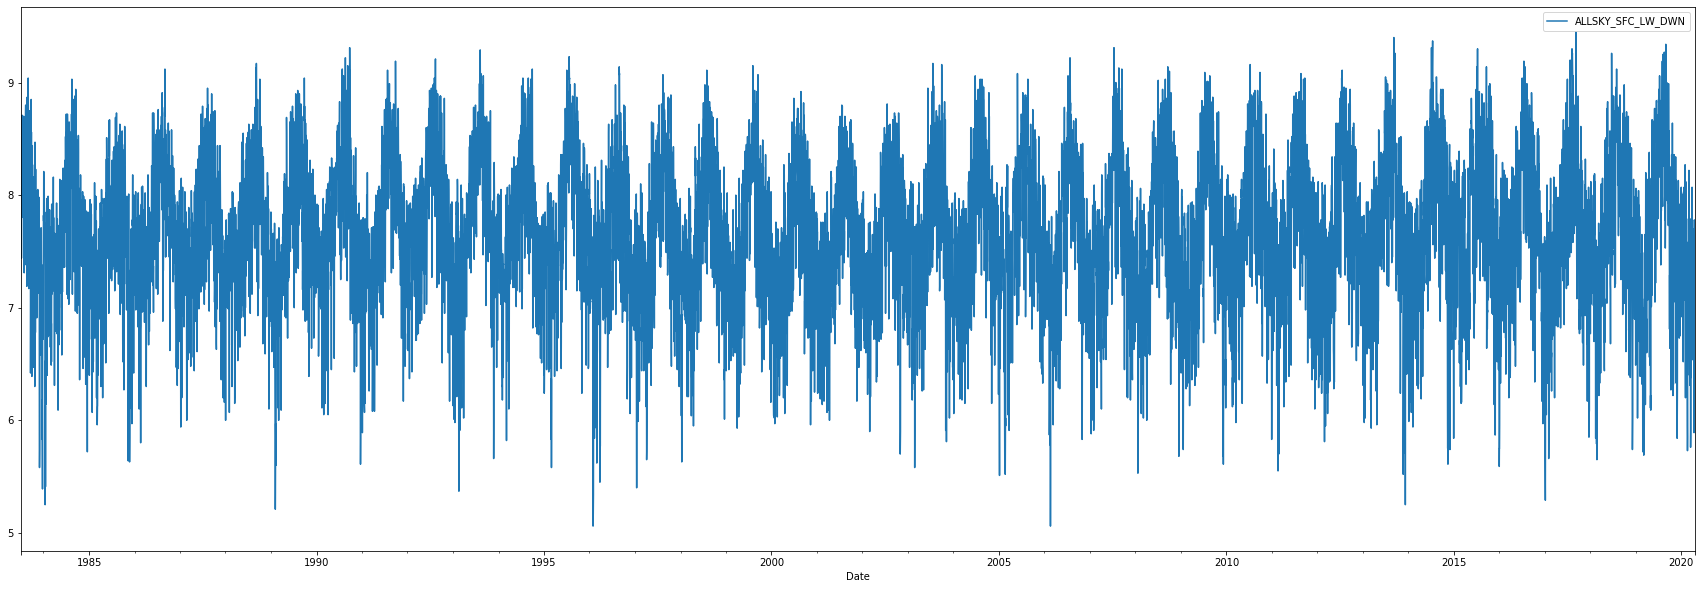

In [2]:
import pandas as pd 

pt_1= pd.read_csv('first_solar_point.csv',skiprows=21)
pt_1.YEAR.astype('str')
pt_1.MO.astype('str')
pt_1.DY.astype('str')
pt_1['Date']=pt_1.YEAR.astype('str')+'/'+pt_1.MO.astype('str')+'/'+pt_1.DY.astype('str')
pt_1['Date']=pd.to_datetime(pt_1['Date'])
pt_1['Date'].asfreq('D')
pt_1_timeseries=pt_1[['Date','ALLSKY_SFC_LW_DWN']]
pt_1_timeseries.set_index('Date',inplace=True)
import numpy as np
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==-999,:]= np.nan
pt_1_timeseries.bfill(inplace=True)
pt_1_timeseries.ffill(inplace=True)
pt_1_timeseries.drop(pd.date_range('1981-01-01','1983-06-30'),inplace=True)
pt_1_timeseries.drop(pd.date_range('2020-04-17','2020-04-23'),inplace=True)

#visualizingtimeseriesdata
import matplotlib.pyplot as plt
%matplotlib inline
pt_1_timeseries.plot(figsize=(30,10))

In [2]:
pt_1_timeseries=pt_1_timeseries.asfreq('D')

In [8]:
len(pt_1_timeseries[-4000:])/pt_1_timeseries.shape[0]

0.2976190476190476

### B.Model selection:

How to train our models?
Generally in machine learning we split the data into train and test in order to see how well our model performs, but time series data is kind of special because it has an ordering. Thus we have to write a split function that maintains this ordering while taking a number of ordered observations. So we are not splitting our data by random but instead we leave the ordering and just take chunks of data for training and testing.
Generally in machine learning we split the data into train and test in order to see how well our model performs, but time series data is kind of special because it has an ordering. Thus we have to write a split function that maintains this ordering while taking a number of ordered observations. So we are not splitting our data by random but instead we leave the ordering and just take chunks of data for training and testing.

In [177]:
# split the train and test data, maintaining the order
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

In [230]:
#split the data train an test datasets
train,test= train_test_split(pt_1_timeseries_ASK,4000)

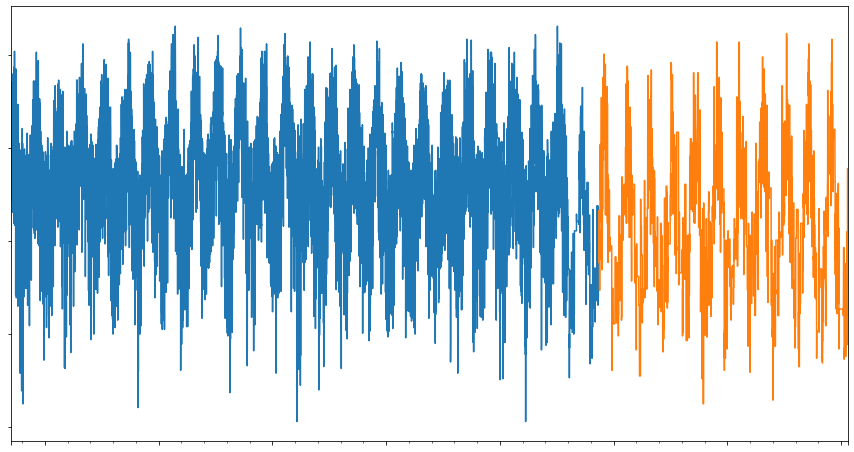

In [180]:
#plotting_the_data
train.ALLSKY_SFC_LW_DWN.plot(figsize=(15,8), title= 'Daily Radiation', fontsize=14)
test.ALLSKY_SFC_LW_DWN.plot(figsize=(15,8), title= 'Daily Radiation', fontsize=14)
plt.show()

In [185]:
pt_1_timeseries_ASK

Date
1983-07-01    8.49
1983-07-02    8.15
1983-07-03    8.33
1983-07-04    8.34
1983-07-05    8.03
              ... 
2020-04-12    5.89
2020-04-13    6.28
2020-04-14    7.78
2020-04-15    7.78
2020-04-16    7.08
Freq: D, Name: ALLSKY_SFC_LW_DWN, Length: 13440, dtype: float64

### C.Model1: Start with Naive Approach

In [ ]:
Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.
y(t+1)^=Y(t)

 RMSE:0.444


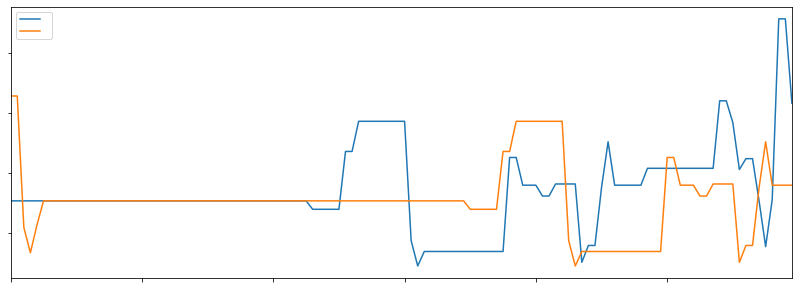

In [218]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

X = pt_1_timeseries_ASK.values
train2, test2 = X[0:-120], X[-120:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# make prediction
    yhat = history[-p]
    predictions.append(yhat)
# observation
    history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))

print(' RMSE:%.3f' %rmse)
# plot scores over persistence values
pd.Series(test2).plot(legend= True, label='test2')
pd.Series(predictions).plot(legend= True, label='predictions')
plt.xlabel('days')
plt.ylabel('radiation')
plt.legend(loc='best')
plt.title("Naive Forecast")
pyplot.show()

The naive methode is not suited for data with high variability, we will adopt different methodes to get better Accuracy scores.

### D.Model2 – Holt-Winters Method

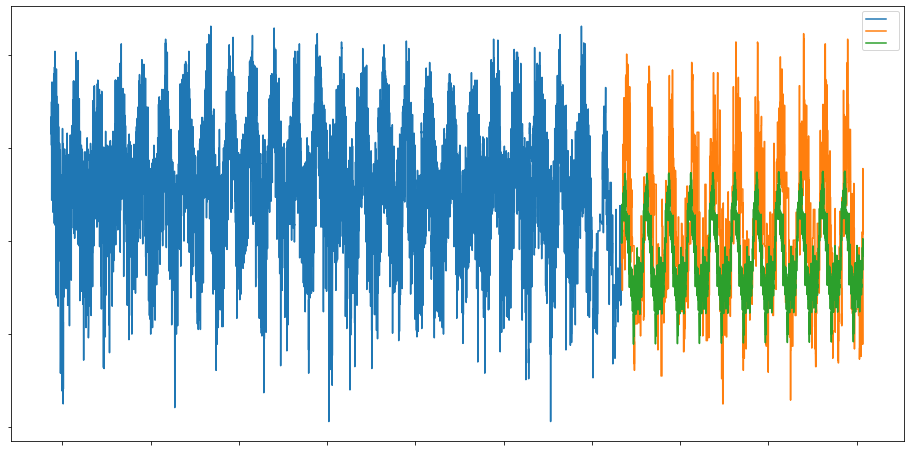

In [221]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['ALLSKY_SFC_LW_DWN']),seasonal_periods=364,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['ALLSKY_SFC_LW_DWN'], label='Train')
plt.plot(test['ALLSKY_SFC_LW_DWN'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [222]:
rms = sqrt(mean_squared_error(test.ALLSKY_SFC_LW_DWN, y_hat_avg.Holt_Winter))
print(rms)

0.7567093177007369


### E.Model3- Sarimax

In [225]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [226]:
#These three distinct integer values, (p, d, q), are used to parametrize ARIMA models
p = d = q = range(0, 2)

In [ ]:
#We shall first generate small ranges of these parameters and use a "grid search" to iteratively explore different combinations of parameters.

In [227]:
# Generate all different combinations of p, d and q triplets
import itertools
pdq=list(itertools.product(p, d, q))

In [241]:
# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]

In [16]:
train=train.asfreq('D')

In [242]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    
        for combs in pdqs:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,simple_differencing=True)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        
            

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =65208.505475547674
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =53718.467968512916
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =20151.63768877511
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =16592.003149621647
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =20132.548528095394
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =16605.496233647595
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =17756.940546097838
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =16571.48821863247
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =53015.53741112952
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =43189.101712959266
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =17715.343964196636
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =13646.954436022264
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =17684.096557002144
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =13655.690232258201
ARIMA (0,

In [244]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [245]:
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 0, 1, 12)
aic           11158.7
Name: 57, dtype: object

The output of our code suggests that ARIMA(1, 1, 1)x(0,0,1, 12) yields the lowest AIC value of 17223.5. We should therefore consider this to be optimal option out of all the models we have considered.

Akaike Information Criterion:ich is provided by ARIMA models fitted using statsmodels library. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value. To achieve this, perform following 

## Fitting an ARIMA Time Series Model
Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

In [81]:
pt_1_timeseries.shape

(13440, 1)

We'll start by plugging the optimal parameter values into a new SARIMAX model.

In [247]:
# Plug the optimal parameter values into a new SARIMAX model
SARIMA_MODEL = sm.tsa.statespace.SARIMAX(pt_1_timeseries_ASK, 
                                        order=(1,1,1), 
                                        pdqs=(0,0,1,12),
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False,simple_differencing=True)

# Fit the model and print results
output = SARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5478      0.009     62.346      0.000       0.531       0.565
ma.L1         -0.9243      0.004   -209.957      0.000      -0.933      -0.916
sigma2         0.1626      0.002     99.748      0.000       0.159       0.166


#Fitting an ARIMA Time Series Model:Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.
We'll start by plugging the optimal parameter values into a new SARIMAX model.

In [248]:
print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5478      0.009     62.346      0.000       0.531       0.565
ma.L1         -0.9243      0.004   -209.957      0.000      -0.933      -0.916
sigma2         0.1626      0.002     99.748      0.000       0.159       0.166


The model returns a lot of information, but we'll focus only on the table of coefficients. The coef column above shows the importance of each feature and how each one impacts the time series patterns. The $P>|z|$ provides the significance of each feature weight.

For our time-series, we see that each weight has a p-value=0 but ma.S.L12, so it is to discuss if it's a good idea  retain all of them in our model.

Next, we shall run model diagnostics to ensure that none of the assumptions made by the model have been violated.
Call the .plot_diagnostics() method on ARIMA output below:

In [ ]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics
plt.show()

The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean. In the absence of these assumptions, we can not move forward and need further tweaking of the model.

Let's check for these assumptions from diagnostics plots.

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model has no correlations and provides a satisfactory fit to help forecast future values.

# Validating the Model

### One-step Ahead Forecasting
In order to validate the model, we start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts.

The .get_prediction() and .conf_int() methods allow us to obtain the values and associated confidence intervals for forecasts of the time series.

For get_predictions(), set the dynamic parameter to False to ensure that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point

In [63]:
pt_1_timeseries.tail()

,ALLSKY_SFC_LW_DWN
Date,
2020-04-12,5.89
2020-04-13,6.28
2020-04-14,7.78
2020-04-15,7.77
2020-04-16,7.08


In [253]:
# Get predictions starting from 2020-04-24 and calculate confidence intervals
pred_one_step_ahead = output.get_prediction(start=pd.to_datetime('2020-02-01'),end='2020-05-01',dynamic=False)

In [240]:
pred_one_step_ahead.predicted_mean

2020-02-01    0.0
2020-02-02    0.0
2020-02-03    0.0
2020-02-04    0.0
2020-02-05    0.0
             ... 
2020-04-27    0.0
2020-04-28    0.0
2020-04-29    0.0
2020-04-30    0.0
2020-05-01    0.0
Freq: D, Length: 91, dtype: float64

In [255]:
pred_conf = pred_one_step_ahead.conf_int()

In [ ]:
# Plot observed values
ax = pt_1_timeseries_ASK['2020':].plot(label='observed',figsize=(20,10))

# Plot predicted values
pred_one_step_ahead.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('radiations')
ax.legend()
ax.get_ylim
plt.show()

The forecasts align with the true values as seen above, with overall increase trend. We shall also check for the accuracy of our forecasts using MSE (Mean Squared Error). This will provide us with the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.

In [71]:
# Get the real and predicted values
pt_1_timeseries_forecasted = pred.predicted_mean

In [73]:
pt_1_timeseries_truth = pt_1_timeseries['2020-02-01':]
np.array(pt_1_timeseries_truth)

array([[7.11],
       [6.74],
       [6.2 ],
       [7.73],
       [8.12],
       [8.07],
       [7.84],
       [6.68],
       [6.81],
       [6.93],
       [7.39],
       [7.29],
       [7.15],
       [7.28],
       [7.43],
       [6.83],
       [6.41],
       [5.94],
       [5.73],
       [5.85],
       [7.58],
       [7.5 ],
       [7.55],
       [7.3 ],
       [7.53],
       [7.35],
       [7.79],
       [7.57],
       [6.67],
       [7.1 ],
       [8.22],
       [7.64],
       [6.63],
       [7.33],
       [6.4 ],
       [6.63],
       [6.39],
       [6.31],
       [7.79],
       [6.41],
       [7.19],
       [7.07],
       [7.11],
       [5.76],
       [5.9 ],
       [6.88],
       [6.38],
       [6.76],
       [6.4 ],
       [7.24],
       [7.62],
       [7.01],
       [6.59],
       [6.54],
       [7.79],
       [8.07],
       [7.88],
       [7.39],
       [6.86],
       [6.99],
       [6.85],
       [7.38],
       [7.28],
       [7.33],
       [7.1 ],
       [6.89],
       [6.

In [74]:
# Compute the mean square error
mse = ((np.array(pt_1_timeseries_forecasted) - np.array(pt_1_timeseries_truth)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.51


The MSE of our one-step ahead forecasts yields a value of 0.51, which is very low. An MSE this close to 0 indicates that the estimator is predicting observations of the parameter with perfect accuracy, which would be an ideal scenario but it is not typically possible.

### Dynamic forecasting

In [95]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2020-02-01'), dynamic=False, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

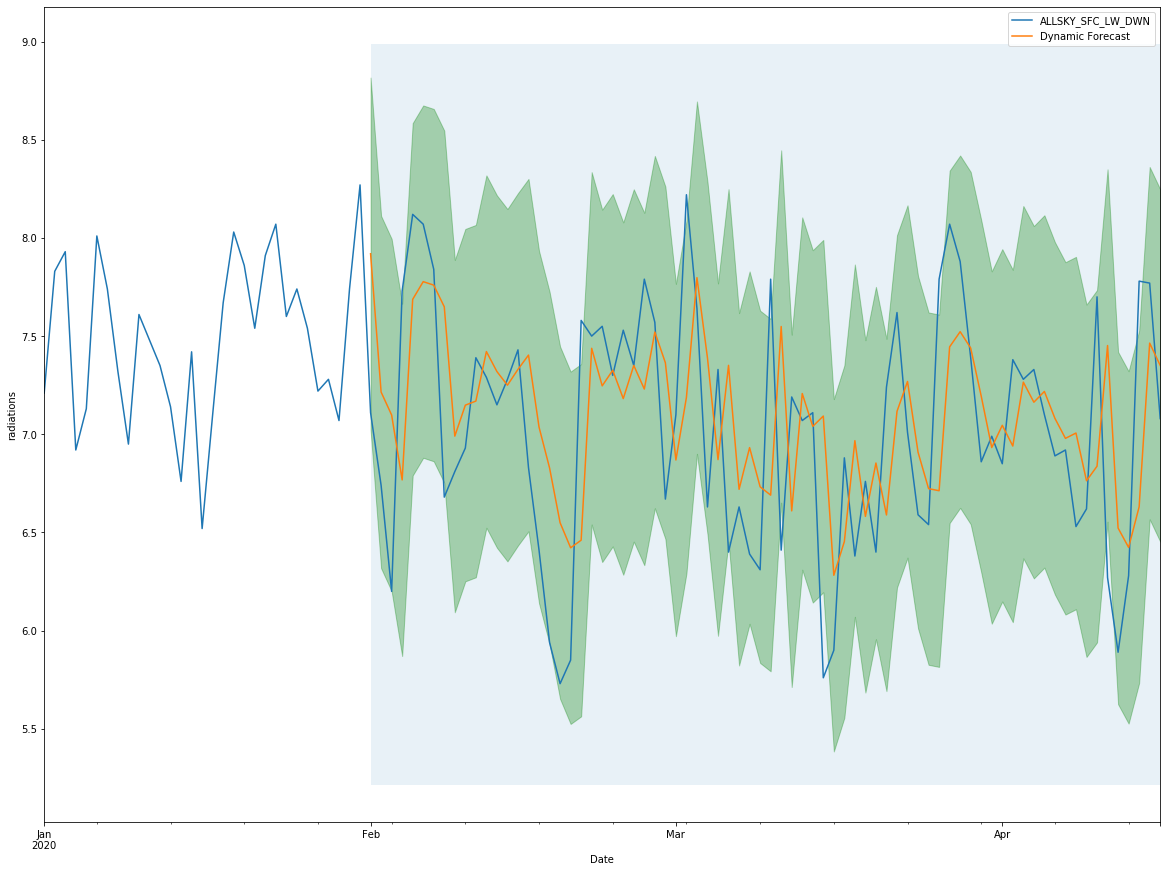

In [96]:
# Plot the dynamic forecast with confidence intervals.
pt_1_timeseries_forecasted = pred_dynamic.predicted_mean
ax = pt_1_timeseries['2020':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-02-01'), pt_1_timeseries_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('radiations')

plt.legend()
plt.show()

In [ ]:
Once again, we quantify the predictive performance of our forecasts by computing the MSE.

In [98]:
# Extract the predicted and true values of our time series
pt_1_timeseries_forecasted = pred_dynamic.predicted_mean
pt_1_timeseries_truth = pt_1_timeseries['2020-02-01':]
# Compute the mean square error
mse = ((np.array(pt_1_timeseries_forecasted) - np.array(pt_1_timeseries_truth)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.66


Both the forecasts and associated confidence interval that we have generated can now be used to further understand the time series and foresee what to expect. Our forecasts show that the time series is expected to continue increasing at a steady pace.

As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.